# Short constructions

#### 1 word



In [1]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('1word-constructions.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "لايسّر"},
            {"role": "assistant", "content": "Good luck"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])

0             He got sick!
1                 Firstly!
2                Don't say
3               What's up?
4               I am sorry
              ...         
95    We didn't tell them.
96                I think.
97              Of course.
98      It's not possible!
99               Excellent
Name: transl, Length: 100, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'He got sick!', "I'm going to be sick!", 0.8856703042984009, True), (3, 'Firstly!', "isn't it!", 0.7980146408081055, True), (4, "Don't say", 'Do not say', 0.9938669204711914, True), (5, "What's up?", 'how big is it?', 0.6552428603172302, False), (6, 'I am sorry', "I'm sorry", 0.9918574094772339, True), (7, 'Reasonably', 'I see!', 0.7275927662849426, True), (8, 'Shame', "It's a shame", 0.9513050317764282, True), (9, 'In peace', 'Good-bye', 0.706678032875061, True), (10, 'Hello.', "You're welcome.", 0.7054896950721741, True), (11, 'Not easy.', 'Good luck.', 0.5653448700904846, False), (12, "I'm satisfied.", 'Perfect.', 0.9034707546234131, True), (13, 'They promised you.', 'I promise.', 0.8620448112487793, True), (14, 'Great!', 'Excellent.', 0.9529227018356323, True), (15, 'What is it?', 'What?', 0.9443386793136597, True), (16, "What's up?", 'right?', 0.7371630668640137, True), (17, 'Patience...', 'Patience...', 1.0, True), (18, 'No!', 'Oh no!', 0.9912242889404297, True), (19, 'They.

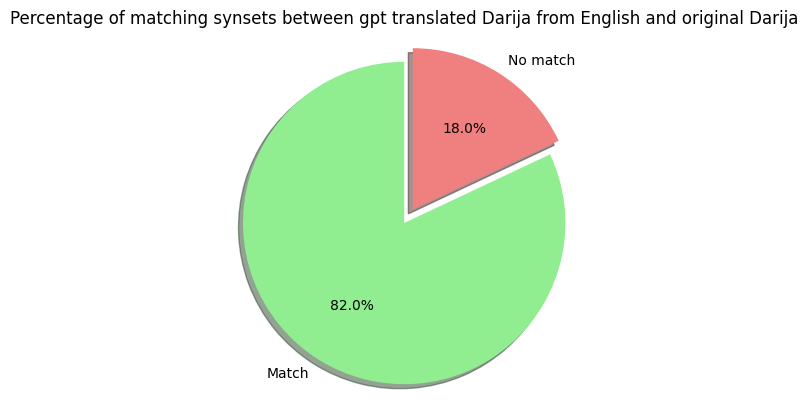

In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()